In [1]:
import pandas as pd

# Load the dataset with the correct delimiter
file_path = '/content/cardio_train.csv'
data = pd.read_csv(file_path, delimiter=';')

# Step 1: Convert age from days to years
data['age_years'] = data['age'] // 365

# Step 2: Filter out height and weight outliers
# Assuming plausible ranges for height: 100-250 cm and weight: 20-200 kg
height_condition = (data['height'] >= 100) & (data['height'] <= 250)
weight_condition = (data['weight'] >= 20) & (data['weight'] <= 200)
data = data[height_condition & weight_condition]

# Step 3: Handle blood pressure (ap_hi, ap_lo) outliers
# Define plausible ranges for systolic (ap_hi) and diastolic (ap_lo) pressures
bp_condition = (data['ap_hi'] > 80) & (data['ap_hi'] < 250) & \
               (data['ap_lo'] > 40) & (data['ap_lo'] < 180)
data = data[bp_condition]

# Display the cleaned dataset summary
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 68608 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68608 non-null  int64  
 1   age          68608 non-null  int64  
 2   gender       68608 non-null  int64  
 3   height       68608 non-null  int64  
 4   weight       68608 non-null  float64
 5   ap_hi        68608 non-null  int64  
 6   ap_lo        68608 non-null  int64  
 7   cholesterol  68608 non-null  int64  
 8   gluc         68608 non-null  int64  
 9   smoke        68608 non-null  int64  
 10  alco         68608 non-null  int64  
 11  active       68608 non-null  int64  
 12  cardio       68608 non-null  int64  
 13  age_years    68608 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.9 MB
None
                 id           age        gender        height        weight  \
count  68608.000000  68608.000000  68608.000000  68608.000000  68608.000000   
mean   499

In [2]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/cleaned_cardio_dataset.csv'
data.to_csv(cleaned_file_path, index=False)

# Provide the cleaned file path for download
print(f"The cleaned dataset has been saved at: {cleaned_file_path}")


The cleaned dataset has been saved at: /content/cleaned_cardio_dataset.csv


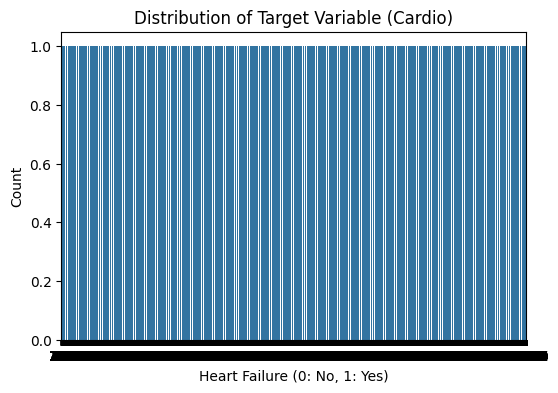

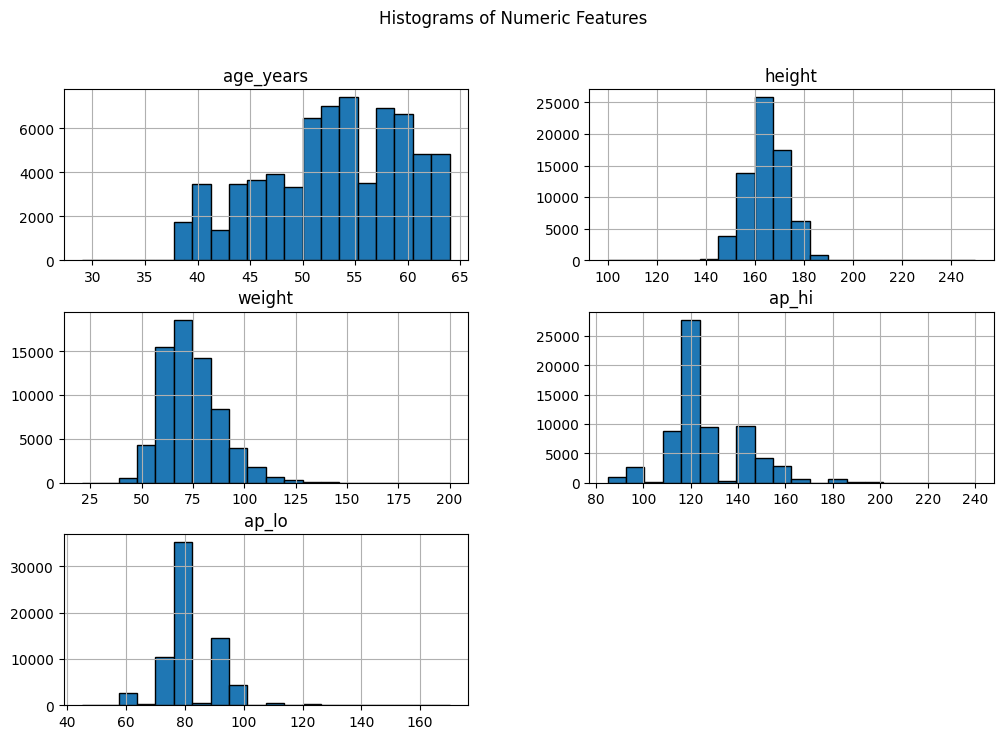

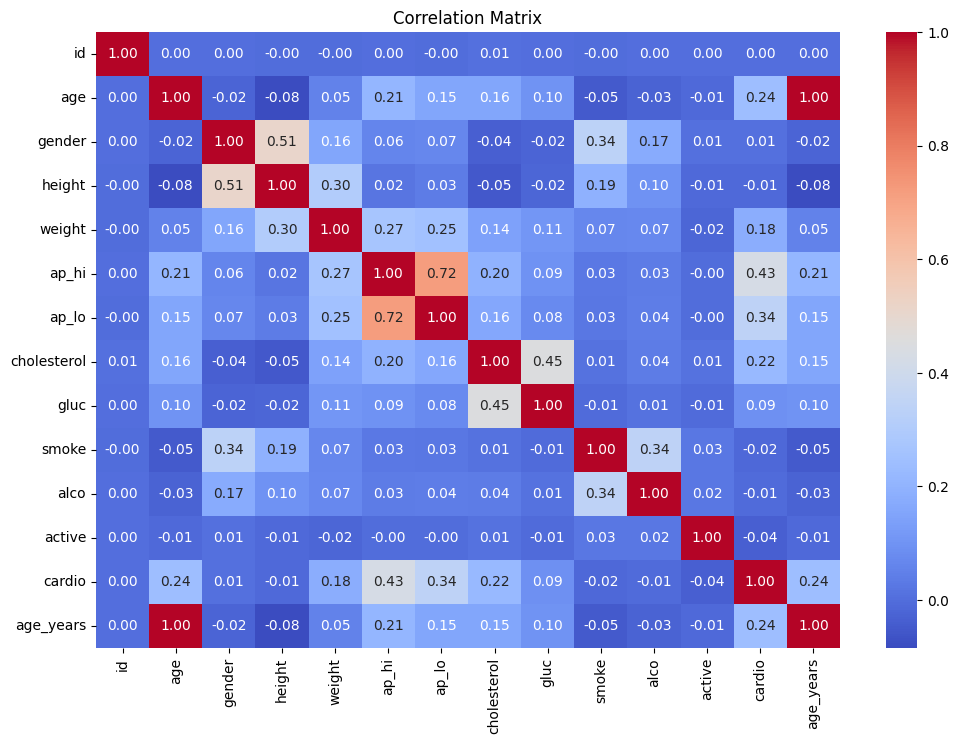

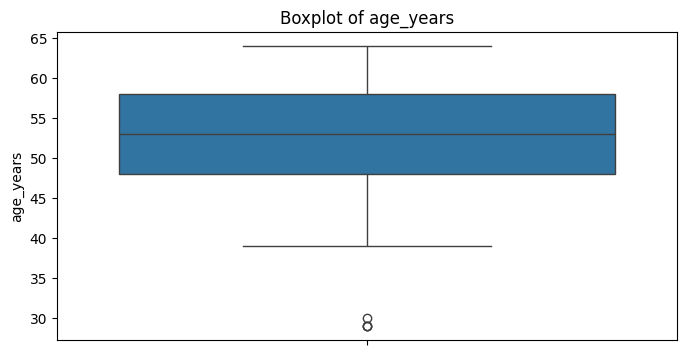

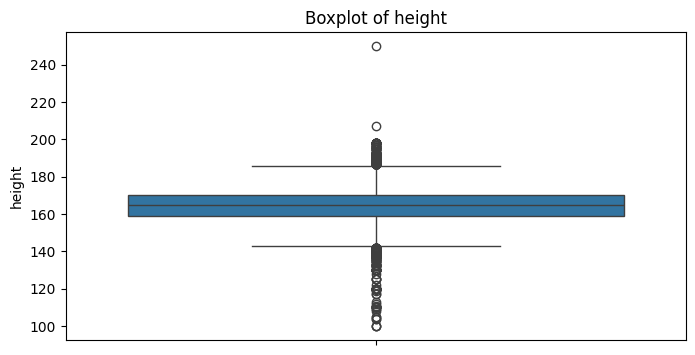

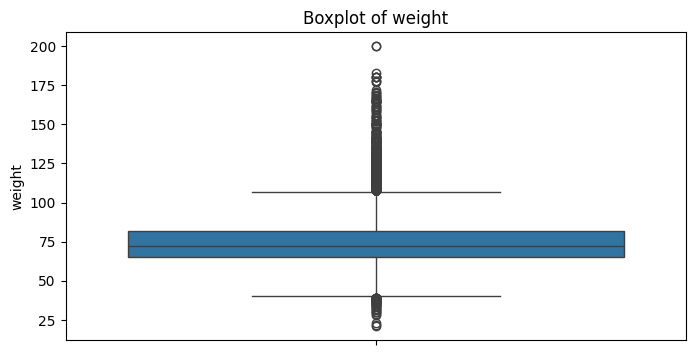

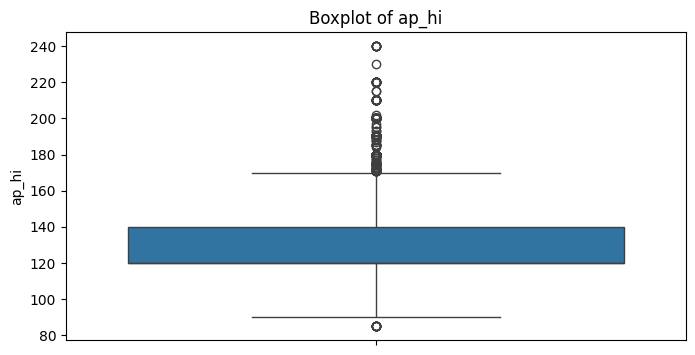

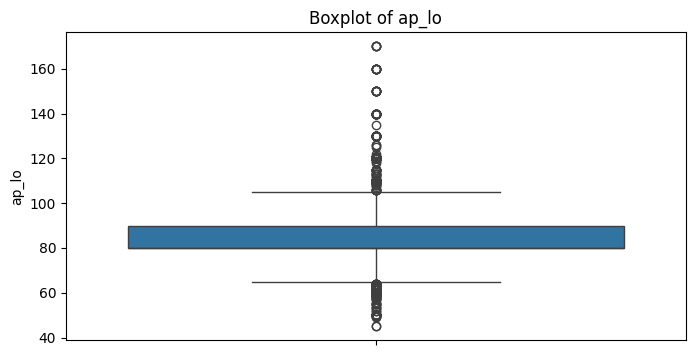

(   id    age    height    weight     ap_hi     ap_lo  cardio  age_years  \
 0   0  18393  0.450907 -0.847849 -1.002805 -0.144011       0  -0.418412   
 1   1  20228 -1.052151  0.759520  0.799024  0.906837       1   0.320454   
 2   2  18857  0.075142 -0.708078  0.198414 -1.194858       1  -0.270639   
 3   3  17623  0.576161  0.549864  1.399633  1.957684       1  -0.713958   
 4   4  17474 -1.052151 -1.267163 -1.603414 -2.245705       0  -0.861731   
 
         bmi  gender_2  cholesterol_2  cholesterol_3  gluc_2  gluc_3  smoke_1  \
 0 -1.029131      True          False          False   False   False    False   
 1  1.391870     False          False           True   False   False    False   
 2 -0.741334     False          False           True   False   False    False   
 3  0.230512      True          False          False   False   False    False   
 4 -0.834103     False          False          False   False   False    False   
 
    alco_1  active_1  
 0   False      True  
 1   Fal

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----------- EDA -----------

# Step 1: Distribution of the target variable (cardio)
plt.figure(figsize=(6, 4))
sns.countplot(data['cardio'])
plt.title('Distribution of Target Variable (Cardio)')
plt.xlabel('Heart Failure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Step 2: Distribution of key numeric features
numeric_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
data[numeric_features].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Step 3: Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Step 4: Boxplots to detect outliers for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# ----------- Feature Engineering -----------

# Step 1: Feature engineering - Create BMI
data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

# Step 2: One-hot encoding for categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Scale numeric features
scaler = StandardScaler()
numeric_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Display the transformed dataset summary
data_encoded.head(), data_encoded.describe()


In [4]:
# Save the feature-engineered dataset to a new CSV file
feature_engineered_file_path = 'feature_engineered_cardio_dataset.csv'
data_encoded.to_csv(feature_engineered_file_path, index=False)

# Provide a link to download the file
from google.colab import files
files.download(feature_engineered_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-5-91a6563c9c53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_dist.index, y=target_dist.values, palette="viridis")


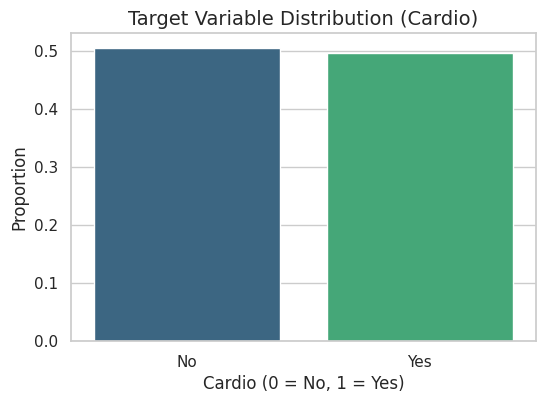

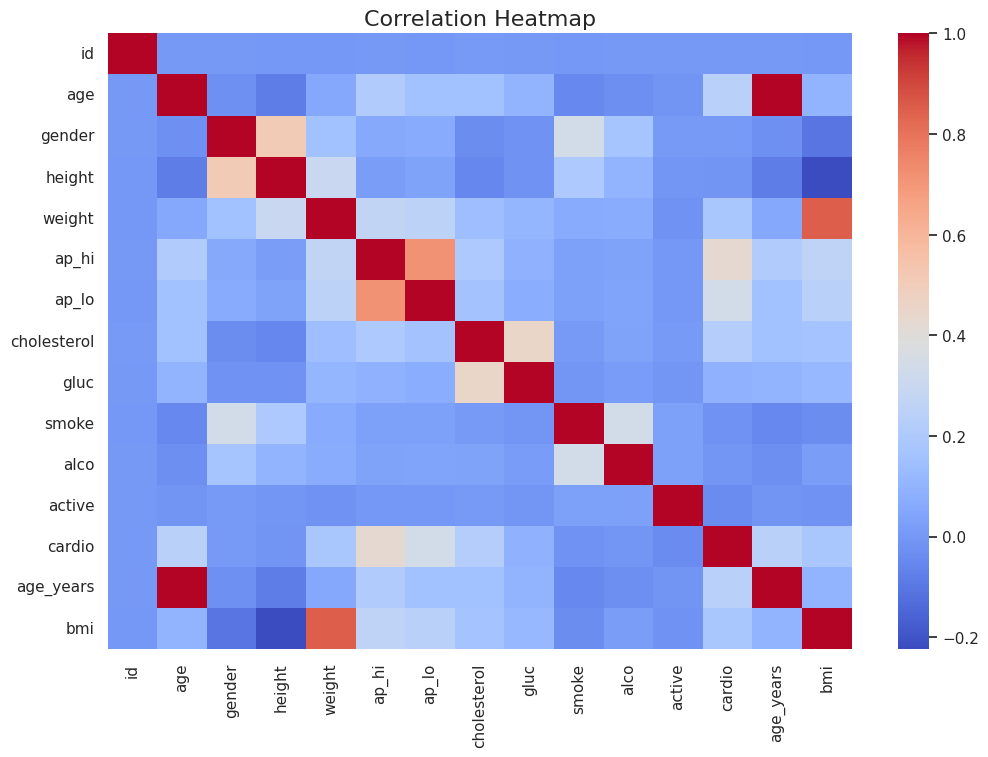

,cardio
cardio,1.000000
ap_hi,0.426183
ap_lo,0.339045
age,0.239063
age_years,0.238897
cholesterol,0.221384
bmi,0.185891
weight,0.179462
gluc,0.089636
gender,0.007160


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Target variable distribution
target_dist = data['cardio'].value_counts(normalize=True)

# Plot target distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=target_dist.index, y=target_dist.values, palette="viridis")
plt.title("Target Variable Distribution (Cardio)", fontsize=14)
plt.xlabel("Cardio (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Summarize correlation with target variable
correlation_with_target = correlation_matrix["cardio"].sort_values(ascending=False)
correlation_with_target


Logistic Regression Baseline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define features and target
X = data.drop(columns=["id", "cardio", "age"])  # Dropping non-predictive columns
y = data["cardio"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Performance metrics
classification_rep = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, roc_auc, conf_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


({'0': {'precision': 0.7079195094567752,
   'recall': 0.7889316650625602,
   'f1-score': 0.7462333287814648,
   'support': 10390.0},
  '1': {'precision': 0.7564415815193247,
   'recall': 0.6682036691847346,
   'f1-score': 0.7095900401104339,
   'support': 10193.0},
  'accuracy': 0.7291454112617208,
  'macro avg': {'precision': 0.7321805454880499,
   'recall': 0.7285676671236474,
   'f1-score': 0.7279116844459493,
   'support': 20583.0},
  'weighted avg': {'precision': 0.7319483429860745,
   'recall': 0.7291454112617208,
   'f1-score': 0.7280870409991289,
   'support': 20583.0}},
 0.7938989107907473,
 array([[8197, 2193],
        [3382, 6811]]))

Random Forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define features and target
X = data.drop(columns=["id", "cardio", "age"])  # Dropping non-predictive columns
y = data["cardio"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate performance
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Classification Report:\n", classification_rep)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     10390
           1       0.77      0.67      0.72     10193

    accuracy                           0.74     20583
   macro avg       0.74      0.74      0.74     20583
weighted avg       0.74      0.74      0.74     20583

ROC-AUC Score: 0.8032366141930425
Confusion Matrix:
 [[8322 2068]
 [3354 6839]]


In [9]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


Code: Gradient Boosting Models

In [10]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Prepare results dictionary to store performance metrics
results = {}

# Define a function to train and evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate performance
    classification_rep = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "classification_report": classification_rep,
        "roc_auc": roc_auc,
        "confusion_matrix": conf_matrix
    }

    print(f"\n{model_name} Results:")
    print("Classification Report:\n", classification_rep)
    print("ROC-AUC Score:", roc_auc)
    print("Confusion Matrix:\n", conf_matrix)

# 1. XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="logloss")
evaluate_model(xgb_model, "XGBoost")

# 2. LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
evaluate_model(lgbm_model, "LightGBM")

# 3. CatBoost
catboost_model = CatBoostClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbose=0)
evaluate_model(catboost_model, "CatBoost")

# Print final results summary
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print("ROC-AUC Score:", metrics["roc_auc"])
    print("Confusion Matrix:\n", metrics["confusion_matrix"])


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:31:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10390
           1       0.76      0.69      0.73     10193

    accuracy                           0.74     20583
   macro avg       0.74      0.74      0.74     20583
weighted avg       0.74      0.74      0.74     20583

ROC-AUC Score: 0.8049342587011958
Confusion Matrix:
 [[8144 2246]
 [3119 7074]]
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.0

In [12]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


Code for Hyperparameter Tuning
1. LightGBM Tuning with Optuna

In [13]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Define the objective function for Optuna
def objective_lightgbm(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0)
    }
    model = LGBMClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred_proba)

# Run the optimization
study_lightgbm = optuna.create_study(direction="maximize")
study_lightgbm.optimize(objective_lightgbm, n_trials=50)

# Best parameters for LightGBM
print("Best LightGBM Parameters:", study_lightgbm.best_params)


[I 2024-12-01 12:44:57,988] A new study created in memory with name: no-name-46f71839-3f5a-452c-b0c3-415e41dc066c


[LightGBM] [Warning] feature_fraction is set=0.8796680270759685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8796680270759685
[LightGBM] [Warning] feature_fraction is set=0.8796680270759685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8796680270759685
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:45:00,315] Trial 0 finished with value: 0.8004341757497053 and parameters: {'num_leaves': 23, 'max_depth': 8, 'learning_rate': 0.21174810739211805, 'n_estimators': 226, 'min_child_samples': 16, 'feature_fraction': 0.8796680270759685}. Best is trial 0 with value: 0.8004341757497053.


[LightGBM] [Warning] feature_fraction is set=0.6777649305861091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6777649305861091
[LightGBM] [Warning] feature_fraction is set=0.6777649305861091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6777649305861091
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] feature_fraction is set=0.6777649305861091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6777649305861091


[I 2024-12-01 12:45:03,759] Trial 1 finished with value: 0.8041071799354271 and parameters: {'num_leaves': 23, 'max_depth': 7, 'learning_rate': 0.010046978182792416, 'n_estimators': 243, 'min_child_samples': 16, 'feature_fraction': 0.6777649305861091}. Best is trial 1 with value: 0.8041071799354271.


[LightGBM] [Warning] feature_fraction is set=0.5197896225070116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5197896225070116
[LightGBM] [Warning] feature_fraction is set=0.5197896225070116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5197896225070116
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:13,590] Trial 2 finished with value: 0.7855679278283318 and parameters: {'num_leaves': 150, 'max_depth': 11, 'learning_rate': 0.20634645934993734, 'n_estimators': 299, 'min_child_samples': 29, 'feature_fraction': 0.5197896225070116}. Best is trial 1 with value: 0.8041071799354271.


[LightGBM] [Warning] feature_fraction is set=0.617260334322697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.617260334322697
[LightGBM] [Warning] feature_fraction is set=0.617260334322697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.617260334322697
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-12-01 12:45:17,568] Trial 3 finished with value: 0.8055030405946748 and parameters: {'num_leaves': 115, 'max_depth': 4, 'learning_rate': 0.0694018096188921, 'n_estimators': 269, 'min_child_samples': 40, 'feature_fraction': 0.617260334322697}. Best is trial 3 with value: 0.8055030405946748.


[LightGBM] [Warning] feature_fraction is set=0.5714648628030028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5714648628030028
[LightGBM] [Warning] feature_fraction is set=0.5714648628030028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5714648628030028
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:22,646] Trial 4 finished with value: 0.8057097772377144 and parameters: {'num_leaves': 124, 'max_depth': 5, 'learning_rate': 0.06578715836887847, 'n_estimators': 165, 'min_child_samples': 17, 'feature_fraction': 0.5714648628030028}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.8829873796751375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8829873796751375
[LightGBM] [Warning] feature_fraction is set=0.8829873796751375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8829873796751375
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:23,657] Trial 5 finished with value: 0.8024078782859437 and parameters: {'num_leaves': 37, 'max_depth': 4, 'learning_rate': 0.0168199285295999, 'n_estimators': 122, 'min_child_samples': 47, 'feature_fraction': 0.8829873796751375}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8829873796751375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8829873796751375
[LightGBM] [Warning] feature_fraction is set=0.7650254984326994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7650254984326994
[LightGBM] [Warni

[I 2024-12-01 12:45:24,528] Trial 6 finished with value: 0.8040750521669034 and parameters: {'num_leaves': 74, 'max_depth': 11, 'learning_rate': 0.09893893742326029, 'n_estimators': 80, 'min_child_samples': 38, 'feature_fraction': 0.7650254984326994}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.6027980052842734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6027980052842734
[LightGBM] [Warning] feature_fraction is set=0.6027980052842734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6027980052842734
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] feature_fraction is set=0.6027980052842734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

[I 2024-12-01 12:45:26,532] Trial 7 finished with value: 0.8048700409337515 and parameters: {'num_leaves': 50, 'max_depth': 9, 'learning_rate': 0.015261870840580297, 'n_estimators': 200, 'min_child_samples': 37, 'feature_fraction': 0.6027980052842734}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.9674510233028162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9674510233028162
[LightGBM] [Warning] feature_fraction is set=0.9674510233028162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9674510233028162
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:27,242] Trial 8 finished with value: 0.8028683227945125 and parameters: {'num_leaves': 113, 'max_depth': 5, 'learning_rate': 0.021710777486337682, 'n_estimators': 75, 'min_child_samples': 10, 'feature_fraction': 0.9674510233028162}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.9674510233028162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9674510233028162
[LightGBM] [Warning] feature_fraction is set=0.7189329772102016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7189329772102016
[LightGBM] [Warning] feature_fraction is set=0.7189329772102016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7189329772102016
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with p

[I 2024-12-01 12:45:29,312] Trial 9 finished with value: 0.8043423098774971 and parameters: {'num_leaves': 90, 'max_depth': 11, 'learning_rate': 0.03054057827373624, 'n_estimators': 188, 'min_child_samples': 33, 'feature_fraction': 0.7189329772102016}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.5170515141729518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5170515141729518
[LightGBM] [Warning] feature_fraction is set=0.5170515141729518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5170515141729518
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] feature_fraction is set=0.5170515141729518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

[I 2024-12-01 12:45:31,145] Trial 10 finished with value: 0.8039084268422148 and parameters: {'num_leaves': 142, 'max_depth': 15, 'learning_rate': 0.04216155497366602, 'n_estimators': 144, 'min_child_samples': 24, 'feature_fraction': 0.5170515141729518}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.6201954584510978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6201954584510978
[LightGBM] [Warning] feature_fraction is set=0.6201954584510978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6201954584510978
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:33,157] Trial 11 finished with value: 0.8052633877426497 and parameters: {'num_leaves': 119, 'max_depth': 3, 'learning_rate': 0.08029758242102149, 'n_estimators': 285, 'min_child_samples': 48, 'feature_fraction': 0.6201954584510978}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.596819005416485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.596819005416485
[LightGBM] [Warning] feature_fraction is set=0.596819005416485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.596819005416485
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-12-01 12:45:35,081] Trial 12 finished with value: 0.8051455040905896 and parameters: {'num_leaves': 116, 'max_depth': 6, 'learning_rate': 0.07835557292583277, 'n_estimators': 144, 'min_child_samples': 43, 'feature_fraction': 0.596819005416485}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.6557601316958466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557601316958466
[LightGBM] [Warning] feature_fraction is set=0.6557601316958466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6557601316958466
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:45:36,901] Trial 13 finished with value: 0.8052572076913642 and parameters: {'num_leaves': 92, 'max_depth': 3, 'learning_rate': 0.12243751407286559, 'n_estimators': 250, 'min_child_samples': 27, 'feature_fraction': 0.6557601316958466}. Best is trial 4 with value: 0.8057097772377144.


[LightGBM] [Warning] feature_fraction is set=0.7739137617949392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7739137617949392
[LightGBM] [Warning] feature_fraction is set=0.7739137617949392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7739137617949392
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:45:38,237] Trial 14 finished with value: 0.8058064815849109 and parameters: {'num_leaves': 131, 'max_depth': 5, 'learning_rate': 0.047199456697309516, 'n_estimators': 160, 'min_child_samples': 23, 'feature_fraction': 0.7739137617949392}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8441527982609287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8441527982609287
[LightGBM] [Warning] feature_fraction is set=0.8441527982609287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8441527982609287
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:39,616] Trial 15 finished with value: 0.8056769035195321 and parameters: {'num_leaves': 134, 'max_depth': 6, 'learning_rate': 0.047181683832731004, 'n_estimators': 155, 'min_child_samples': 20, 'feature_fraction': 0.8441527982609287}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7835631391625187, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7835631391625187
[LightGBM] [Warning] feature_fraction is set=0.7835631391625187, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7835631391625187
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:45:40,773] Trial 16 finished with value: 0.8013175312238947 and parameters: {'num_leaves': 132, 'max_depth': 7, 'learning_rate': 0.13955348015516306, 'n_estimators': 115, 'min_child_samples': 10, 'feature_fraction': 0.7835631391625187}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.801953004408784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.801953004408784
[LightGBM] [Warning] feature_fraction is set=0.801953004408784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.801953004408784
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] feature_fraction is set=0.801953004408784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.801

[I 2024-12-01 12:45:42,403] Trial 17 finished with value: 0.804895431549346 and parameters: {'num_leaves': 70, 'max_depth': 13, 'learning_rate': 0.034516100996760286, 'n_estimators': 174, 'min_child_samples': 22, 'feature_fraction': 0.801953004408784}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.6993114443500033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6993114443500033
[LightGBM] [Warning] feature_fraction is set=0.6993114443500033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6993114443500033
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:45:44,368] Trial 18 finished with value: 0.7811908557525041 and parameters: {'num_leaves': 100, 'max_depth': 9, 'learning_rate': 0.2984325626737331, 'n_estimators': 212, 'min_child_samples': 17, 'feature_fraction': 0.6993114443500033}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.9926549128939008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9926549128939008
[LightGBM] [Warning] feature_fraction is set=0.9926549128939008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9926549128939008
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:45,265] Trial 19 finished with value: 0.8055540153950791 and parameters: {'num_leaves': 129, 'max_depth': 5, 'learning_rate': 0.057660710855091966, 'n_estimators': 104, 'min_child_samples': 25, 'feature_fraction': 0.9926549128939008}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7295653753953749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7295653753953749
[LightGBM] [Warning] feature_fraction is set=0.7295653753953749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7295653753953749
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:47,439] Trial 20 finished with value: 0.8045717366095191 and parameters: {'num_leaves': 99, 'max_depth': 9, 'learning_rate': 0.029333181203769047, 'n_estimators': 172, 'min_child_samples': 31, 'feature_fraction': 0.7295653753953749}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8528366674924354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8528366674924354
[LightGBM] [Warning] feature_fraction is set=0.8528366674924354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8528366674924354
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:49,325] Trial 21 finished with value: 0.8055899720571036 and parameters: {'num_leaves': 134, 'max_depth': 6, 'learning_rate': 0.04658740777661237, 'n_estimators': 148, 'min_child_samples': 19, 'feature_fraction': 0.8528366674924354}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8279171829147333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8279171829147333
[LightGBM] [Warning] feature_fraction is set=0.8279171829147333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8279171829147333
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:50,815] Trial 22 finished with value: 0.8055818327076643 and parameters: {'num_leaves': 139, 'max_depth': 5, 'learning_rate': 0.05479053507925129, 'n_estimators': 168, 'min_child_samples': 21, 'feature_fraction': 0.8279171829147333}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.9273529767375197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9273529767375197
[LightGBM] [Warning] feature_fraction is set=0.9273529767375197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9273529767375197
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:52,477] Trial 23 finished with value: 0.8044248364599798 and parameters: {'num_leaves': 150, 'max_depth': 7, 'learning_rate': 0.03654808177928595, 'n_estimators': 149, 'min_child_samples': 13, 'feature_fraction': 0.9273529767375197}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8167675195169956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8167675195169956
[LightGBM] [Warning] feature_fraction is set=0.8167675195169956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8167675195169956
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:45:53,604] Trial 24 finished with value: 0.8052373361590033 and parameters: {'num_leaves': 127, 'max_depth': 6, 'learning_rate': 0.025473327582550196, 'n_estimators': 99, 'min_child_samples': 23, 'feature_fraction': 0.8167675195169956}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.5610856699792923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5610856699792923
[LightGBM] [Warning] feature_fraction is set=0.5610856699792923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5610856699792923
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:54,678] Trial 25 finished with value: 0.8052671269333433 and parameters: {'num_leaves': 106, 'max_depth': 4, 'learning_rate': 0.061352393894608434, 'n_estimators': 127, 'min_child_samples': 19, 'feature_fraction': 0.5610856699792923}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5610856699792923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5610856699792923
[LightGBM] [Warning] feature_fraction is set=0.7509373024309807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7509373024309807
[LightGBM] [Warning] feature_fraction is set=0.7509373024309807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7509373024309807
[LightGBM] [I

[I 2024-12-01 12:45:55,466] Trial 26 finished with value: 0.8044584938974236 and parameters: {'num_leaves': 123, 'max_depth': 8, 'learning_rate': 0.04553356821680886, 'n_estimators': 53, 'min_child_samples': 13, 'feature_fraction': 0.7509373024309807}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7509373024309807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7509373024309807
[LightGBM] [Warning] feature_fraction is set=0.9159181347997524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9159181347997524
[LightGBM] [Warning] feature_fraction is set=0.9159181347997524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9159181347997524
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training fr

[I 2024-12-01 12:45:56,543] Trial 27 finished with value: 0.8051557443741941 and parameters: {'num_leaves': 81, 'max_depth': 3, 'learning_rate': 0.09863066198463494, 'n_estimators': 191, 'min_child_samples': 26, 'feature_fraction': 0.9159181347997524}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8487152678363206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487152678363206
[LightGBM] [Warning] feature_fraction is set=0.8487152678363206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487152678363206
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:45:57,711] Trial 28 finished with value: 0.8052515469721195 and parameters: {'num_leaves': 141, 'max_depth': 5, 'learning_rate': 0.09136115123870105, 'n_estimators': 161, 'min_child_samples': 20, 'feature_fraction': 0.8487152678363206}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.6600779902768402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6600779902768402
[LightGBM] [Warning] feature_fraction is set=0.6600779902768402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6600779902768402
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:00,354] Trial 29 finished with value: 0.8052792981878995 and parameters: {'num_leaves': 108, 'max_depth': 8, 'learning_rate': 0.020963794484512927, 'n_estimators': 222, 'min_child_samples': 14, 'feature_fraction': 0.6600779902768402}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.870569194043358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.870569194043358
[LightGBM] [Warning] feature_fraction is set=0.870569194043358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.870569194043358
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-01 12:46:02,514] Trial 30 finished with value: 0.8025969340335943 and parameters: {'num_leaves': 55, 'max_depth': 6, 'learning_rate': 0.14207850691847712, 'n_estimators': 205, 'min_child_samples': 29, 'feature_fraction': 0.870569194043358}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8466000900250873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8466000900250873
[LightGBM] [Warning] feature_fraction is set=0.8466000900250873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8466000900250873
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:04,342] Trial 31 finished with value: 0.805616547693991 and parameters: {'num_leaves': 135, 'max_depth': 6, 'learning_rate': 0.04755400871458277, 'n_estimators': 153, 'min_child_samples': 18, 'feature_fraction': 0.8466000900250873}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.9091654443524606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9091654443524606
[LightGBM] [Warning] feature_fraction is set=0.9091654443524606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9091654443524606
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:06,188] Trial 32 finished with value: 0.8045637719444935 and parameters: {'num_leaves': 124, 'max_depth': 7, 'learning_rate': 0.045411084648811356, 'n_estimators': 187, 'min_child_samples': 16, 'feature_fraction': 0.9091654443524606}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7646318393803775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7646318393803775
[LightGBM] [Warning] feature_fraction is set=0.7646318393803775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7646318393803775
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:07,189] Trial 33 finished with value: 0.80549113844854 and parameters: {'num_leaves': 143, 'max_depth': 4, 'learning_rate': 0.065523557529337, 'n_estimators': 134, 'min_child_samples': 18, 'feature_fraction': 0.7646318393803775}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8091021832803698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8091021832803698
[LightGBM] [Warning] feature_fraction is set=0.8091021832803698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8091021832803698
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:08,656] Trial 34 finished with value: 0.8052780234637993 and parameters: {'num_leaves': 149, 'max_depth': 6, 'learning_rate': 0.03718798617350222, 'n_estimators': 159, 'min_child_samples': 14, 'feature_fraction': 0.8091021832803698}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.5547764340376304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5547764340376304
[LightGBM] [Warning] feature_fraction is set=0.5547764340376304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5547764340376304
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:11,485] Trial 35 finished with value: 0.8046005784225846 and parameters: {'num_leaves': 136, 'max_depth': 7, 'learning_rate': 0.010017969956664641, 'n_estimators': 234, 'min_child_samples': 23, 'feature_fraction': 0.5547764340376304}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8776396085532001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8776396085532001
[LightGBM] [Warning] feature_fraction is set=0.8776396085532001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8776396085532001
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:12,732] Trial 36 finished with value: 0.8055754402023619 and parameters: {'num_leaves': 122, 'max_depth': 4, 'learning_rate': 0.05172419623547139, 'n_estimators': 181, 'min_child_samples': 21, 'feature_fraction': 0.8776396085532001}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7823397855424254, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7823397855424254
[LightGBM] [Warning] feature_fraction is set=0.7823397855424254, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7823397855424254
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:14,407] Trial 37 finished with value: 0.8024451427204708 and parameters: {'num_leaves': 110, 'max_depth': 8, 'learning_rate': 0.08144816786495498, 'n_estimators': 133, 'min_child_samples': 16, 'feature_fraction': 0.7823397855424254}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8444237505593182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8444237505593182
[LightGBM] [Warning] feature_fraction is set=0.8444237505593182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8444237505593182
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] feature_fraction is set=0.8444237505593182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8444237505593182


[I 2024-12-01 12:46:16,568] Trial 38 finished with value: 0.8038666394977323 and parameters: {'num_leaves': 130, 'max_depth': 10, 'learning_rate': 0.014457106456905625, 'n_estimators': 107, 'min_child_samples': 28, 'feature_fraction': 0.8444237505593182}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.9471629050168795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9471629050168795
[LightGBM] [Warning] feature_fraction is set=0.9471629050168795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9471629050168795
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:17,620] Trial 39 finished with value: 0.8055305132596329 and parameters: {'num_leaves': 29, 'max_depth': 5, 'learning_rate': 0.0658772924309376, 'n_estimators': 91, 'min_child_samples': 33, 'feature_fraction': 0.9471629050168795}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7279926986310156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7279926986310156
[LightGBM] [Warning] feature_fraction is set=0.7279926986310156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7279926986310156
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:18,899] Trial 40 finished with value: 0.8046230041243463 and parameters: {'num_leaves': 146, 'max_depth': 4, 'learning_rate': 0.027582800991446978, 'n_estimators': 161, 'min_child_samples': 12, 'feature_fraction': 0.7279926986310156}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8487675549271199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487675549271199
[LightGBM] [Warning] feature_fraction is set=0.8487675549271199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487675549271199
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:20,263] Trial 41 finished with value: 0.8051767867642469 and parameters: {'num_leaves': 134, 'max_depth': 6, 'learning_rate': 0.04861112381713309, 'n_estimators': 150, 'min_child_samples': 19, 'feature_fraction': 0.8487675549271199}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.9049544627340478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9049544627340478
[LightGBM] [Warning] feature_fraction is set=0.9049544627340478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9049544627340478
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:21,460] Trial 42 finished with value: 0.8057633392559219 and parameters: {'num_leaves': 136, 'max_depth': 5, 'learning_rate': 0.03706512430529017, 'n_estimators': 140, 'min_child_samples': 18, 'feature_fraction': 0.9049544627340478}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8912084724568989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8912084724568989
[LightGBM] [Warning] feature_fraction is set=0.8912084724568989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8912084724568989
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:22,529] Trial 43 finished with value: 0.8056283506949182 and parameters: {'num_leaves': 117, 'max_depth': 5, 'learning_rate': 0.03924408397388689, 'n_estimators': 122, 'min_child_samples': 16, 'feature_fraction': 0.8912084724568989}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8912084724568989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8912084724568989
[LightGBM] [Warning] feature_fraction is set=0.8939905670655209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8939905670655209
[LightGBM] [Warning] feature_fraction is set=0.8939905670655209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8939905670655209
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0046

[I 2024-12-01 12:46:23,612] Trial 44 finished with value: 0.8055139937795354 and parameters: {'num_leaves': 116, 'max_depth': 5, 'learning_rate': 0.03844442712381573, 'n_estimators': 122, 'min_child_samples': 15, 'feature_fraction': 0.8939905670655209}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8939905670655209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8939905670655209
[LightGBM] [Warning] feature_fraction is set=0.959743574813265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.959743574813265
[LightGBM] [Warning] feature_fraction is set=0.959743574813265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.959743574813265
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 4802

[I 2024-12-01 12:46:24,518] Trial 45 finished with value: 0.8014371994896948 and parameters: {'num_leaves': 119, 'max_depth': 3, 'learning_rate': 0.022780609086848074, 'n_estimators': 132, 'min_child_samples': 17, 'feature_fraction': 0.959743574813265}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.8955515622597308, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8955515622597308
[LightGBM] [Warning] feature_fraction is set=0.8955515622597308, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8955515622597308
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:25,543] Trial 46 finished with value: 0.8047467656708679 and parameters: {'num_leaves': 126, 'max_depth': 4, 'learning_rate': 0.032484432224966005, 'n_estimators': 137, 'min_child_samples': 11, 'feature_fraction': 0.8955515622597308}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.9982403421738615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9982403421738615
[LightGBM] [Warning] feature_fraction is set=0.9982403421738615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9982403421738615
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-12-01 12:46:26,629] Trial 47 finished with value: 0.8036478213029437 and parameters: {'num_leaves': 98, 'max_depth': 5, 'learning_rate': 0.018325102936169936, 'n_estimators': 117, 'min_child_samples': 24, 'feature_fraction': 0.9982403421738615}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9982403421738615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9982403421738615
[LightGBM] [Warning] feature_fraction is set=0.9395704737530743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9395704737530743
[LightGBM] [Warni

[I 2024-12-01 12:46:27,747] Trial 48 finished with value: 0.8030943030502637 and parameters: {'num_leaves': 104, 'max_depth': 14, 'learning_rate': 0.07528405059261259, 'n_estimators': 84, 'min_child_samples': 21, 'feature_fraction': 0.9395704737530743}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] feature_fraction is set=0.7933549347858386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7933549347858386
[LightGBM] [Warning] feature_fraction is set=0.7933549347858386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7933549347858386
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2024-12-01 12:46:28,572] Trial 49 finished with value: 0.8012296460789913 and parameters: {'num_leaves': 114, 'max_depth': 3, 'learning_rate': 0.03999168231693519, 'n_estimators': 69, 'min_child_samples': 15, 'feature_fraction': 0.7933549347858386}. Best is trial 14 with value: 0.8058064815849109.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7933549347858386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7933549347858386
Best LightGBM Parameters: {'num_leaves': 131, 'max_depth': 5, 'learning_rate': 0.047199456697309516, 'n_estimators': 160, 'min_child_samples': 23, 'feature_fraction': 0.7739137617949392}


2. CatBoost Tuning with Optuna
python
Copy code


In [14]:
from catboost import CatBoostClassifier

# Define the objective function for Optuna
def objective_catboost(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'iterations': trial.suggest_int('iterations', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 256)
    }
    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred_proba)

# Run the optimization
study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)

# Best parameters for CatBoost
print("Best CatBoost Parameters:", study_catboost.best_params)


[I 2024-12-01 12:48:35,542] A new study created in memory with name: no-name-201484f3-f556-4b63-9f3b-e2fcfe5fce2f
[I 2024-12-01 12:48:40,307] Trial 0 finished with value: 0.8011788837326037 and parameters: {'depth': 5, 'iterations': 235, 'learning_rate': 0.24095448116062382, 'l2_leaf_reg': 0.04678514049456613, 'border_count': 162}. Best is trial 0 with value: 0.8011788837326037.
[I 2024-12-01 12:48:45,964] Trial 1 finished with value: 0.8041900889351399 and parameters: {'depth': 7, 'iterations': 219, 'learning_rate': 0.12273970080954157, 'l2_leaf_reg': 0.7849582501815177, 'border_count': 251}. Best is trial 1 with value: 0.8041900889351399.
[I 2024-12-01 12:48:48,963] Trial 2 finished with value: 0.801747032985233 and parameters: {'depth': 4, 'iterations': 292, 'learning_rate': 0.01108876033243462, 'l2_leaf_reg': 0.7517783516217729, 'border_count': 151}. Best is trial 1 with value: 0.8041900889351399.
[I 2024-12-01 12:48:56,340] Trial 3 finished with value: 0.8050997414953949 and param

Best CatBoost Parameters: {'depth': 8, 'iterations': 161, 'learning_rate': 0.08682563006841845, 'l2_leaf_reg': 4.9832748824862945, 'border_count': 194}


Save the Optimized Models

In [15]:
import joblib

# Save LightGBM model
best_lgbm = LGBMClassifier(**study_lightgbm.best_params, random_state=42)
best_lgbm.fit(X_train, y_train)
joblib.dump(best_lgbm, 'best_lgbm_model.pkl')

# Save CatBoost model
best_catboost = CatBoostClassifier(**study_catboost.best_params, random_state=42, verbose=0)
best_catboost.fit(X_train, y_train)
joblib.dump(best_catboost, 'best_catboost_model.pkl')


[LightGBM] [Warning] feature_fraction is set=0.7739137617949392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7739137617949392
[LightGBM] [Warning] feature_fraction is set=0.7739137617949392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7739137617949392
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

['best_catboost_model.pkl']

Train and Evaluate LightGBM

In [16]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train LightGBM with best parameters
best_lgbm = LGBMClassifier(
    num_leaves=131,
    max_depth=5,
    learning_rate=0.047199456697309516,
    n_estimators=160,
    min_child_samples=23,
    feature_fraction=0.7739137617949392,
    random_state=42
)

best_lgbm.fit(X_train, y_train)

# Evaluate LightGBM
y_pred_lgbm = best_lgbm.predict(X_test)
y_pred_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]

print("=== LightGBM Results ===")
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Warning] feature_fraction is set=0.7739137617949392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7739137617949392
[LightGBM] [Warning] feature_fraction is set=0.7739137617949392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7739137617949392
[LightGBM] [Info] Number of positive: 23784, number of negative: 24241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 48025, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495242 -> initscore=-0.019032
[LightGBM] [Info] Start training from score -0.019032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Train and Evaluate CatBoost

In [17]:
from catboost import CatBoostClassifier

# Train CatBoost with best parameters
best_catboost = CatBoostClassifier(
    depth=8,
    iterations=161,
    learning_rate=0.08682563006841845,
    l2_leaf_reg=4.9832748824862945,
    border_count=194,
    random_state=42,
    verbose=0
)

best_catboost.fit(X_train, y_train)

# Evaluate CatBoost
y_pred_catboost = best_catboost.predict(X_test)
y_pred_prob_catboost = best_catboost.predict_proba(X_test)[:, 1]

print("=== CatBoost Results ===")
print("Classification Report:\n", classification_report(y_test, y_pred_catboost))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_catboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))


=== CatBoost Results ===
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10390
           1       0.76      0.70      0.73     10193

    accuracy                           0.74     20583
   macro avg       0.74      0.74      0.74     20583
weighted avg       0.74      0.74      0.74     20583

ROC-AUC Score: 0.8059383494324692
Confusion Matrix:
 [[8122 2268]
 [3095 7098]]


Save the Best Model

In [18]:
import joblib

# Save the best model
if roc_auc_score(y_test, y_pred_prob_lgbm) > roc_auc_score(y_test, y_pred_prob_catboost):
    joblib.dump(best_lgbm, 'best_model.pkl')
    print("LightGBM saved as the best model.")
else:
    joblib.dump(best_catboost, 'best_model.pkl')
    print("CatBoost saved as the best model.")


CatBoost saved as the best model.


Steps for Model Deployment:
Model Loading and Prediction: To load the saved model and use it for making predictions on new data, you can use the following code:

In [22]:
# Check the feature names that the model expects
print(loaded_model.feature_names_)


['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi']


In [23]:
import pandas as pd
import joblib

# Load the saved CatBoost model
loaded_model = joblib.load('best_model_catboost.pkl')

# Feature names that the model was trained on (as provided)
feature_names = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi']

# Example data for prediction (make sure to provide valid values for these features)
new_data = pd.DataFrame({
    'gender': [1],       # Example value for gender (1 for male, 0 for female)
    'height': [170],     # Example value for height in cm
    'weight': [70],      # Example value for weight in kg
    'ap_hi': [120],      # Example value for systolic blood pressure
    'ap_lo': [80],       # Example value for diastolic blood pressure
    'cholesterol': [1],  # Example value for cholesterol (1 for normal)
    'gluc': [1],         # Example value for glucose (1 for normal)
    'smoke': [0],        # Example value for smoking (0 for no, 1 for yes)
    'alco': [0],         # Example value for alcohol (0 for no, 1 for yes)
    'active': [1],       # Example value for activity (0 for no, 1 for yes)
    'age_years': [45],   # Example value for age in years
    'bmi': [24]          # Example value for BMI (Body Mass Index)
})

# Ensure that the new_data has the same feature columns as the model
new_data = new_data[feature_names]  # Reorder the columns to match model's expectations

# Make predictions
predictions = loaded_model.predict(new_data)
predicted_probabilities = loaded_model.predict_proba(new_data)[:, 1]  # Probabilities for class 1

print("Predictions:", predictions)
print("Predicted probabilities:", predicted_probabilities)


Predictions: [0]
Predicted probabilities: [0.22438686]


Flask API

In [24]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the saved model
model = joblib.load('best_model_catboost.pkl')

# Feature names that the model was trained on
feature_names = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi']

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get the JSON data from the request
    input_data = pd.DataFrame(data)  # Convert to DataFrame for prediction

    # Ensure that input_data has the correct columns in the correct order
    input_data = input_data[feature_names]  # Reorder the columns to match model's expectations

    prediction = model.predict(input_data)
    predicted_probabilities = model.predict_proba(input_data)[:, 1]

    return jsonify({'prediction': prediction.tolist(), 'probabilities': predicted_probabilities.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
